<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Deep Learning
</font>
<hr/>
<font color="#800080" size=5>
Assignment 1 : Introduction to Machine Learning
<br>
</font>
<font size=5>
Instructor: Dr. M. Bejani
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: TBD
</font>
<hr>
<font color='red'  size=4>
Note: It is highly recommended to run your notebook on Google Colab or Kaggle
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram : @amirhosseinjadidi
</font>
<br>
<hr>
</div></font>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
Name = "Seyyed Amirmahdi Sadrzadeh"
StudentId = "401102015"

# Dimensionality Reduction (PCA)

The primary purpose of this exercise is to implement PCA from scratch and without prepared functions in sklearn.

Then we want to compare and analyze results after and before dimensionality reduction.

In [8]:
import pandas as pd
import numpy as np
import os
import cv2
import imutils

# Dataset

Brain Tumor dataset is attached to the notebook. It has two folders (yes and no).

'yes' folder contains MRI images of patients with Tumor and 'no' folder contains images of healthy people.

<font color='blue'  size=3>
Note: We wish no one would be in 'yes' folder in real life.


## Preprocess

In [9]:
### Cropping is a suggested tool for preprocessing this dataset

def crop_brain(image):

    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    return new_image

## Load data

In [10]:
IMG_WIDTH, IMG_HEIGHT = (128,128)
DATASET_PATH = "drive/MyDrive/Deep/HW1/BrainTumor"  # Adjust this path accordingly
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  load data (use cv2) then crop (use function above) and after that resize each image to (128,128) then change it to
#  one channel image (gray scale not RGB)
#  assign lablel 1 for patients with tumor and 0 otherwise
#####################################################################################
X = []
y = []

for cat in ["yes", "no"]:
    label = 1 if cat == "yes" else 0
    path = os.path.join(DATASET_PATH, cat)
    for name in os.listdir(path):
        img_path = os.path.join(path, name)
        image = cv2.imread(img_path)
        if image is None:
            continue

        cropped = crop_brain(image)
        resized = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

        X.append(gray)
        y.append(label)


####################################################################################
#                                   THE END                                        #
####################################################################################
X = np.array(X)
y = np.array(y)
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  shuffle data (becareful about labels)
#####################################################################################
df = pd.DataFrame({"image": list(X), "label": y})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = np.array(df["image"].tolist())
y = np.array(df["label"].tolist())
####################################################################################
#                                   THE END                                        #
####################################################################################

In [11]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  show number of example and x , y size
#####################################################################################
print("Number of examples is: ", X.shape[0])
print("X shape is: ", X.shape)
print("y shape is: ", y.shape)
####################################################################################
#                                   THE END                                        #
####################################################################################

Number of examples is:  253
X shape is:  (253, 128, 128)
y shape is:  (253,)


## Flatten

Reshape X so that each row represents one image or 128*128 pixels (2D data)

In [12]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Reshape X to (number_of_example, number_of_all_pixels)
#####################################################################################
X = X.reshape(X.shape[0], -1)
print("Reshaped X shape: ", X.shape)
####################################################################################
#                                   THE END                                        #
####################################################################################

Reshaped X shape:  (253, 16384)


## Split
In this section, split dataset to train and test and you can use splitting function from sklearn.

In [13]:

#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Split data to train and test (testsize = 0.2)
#####################################################################################
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
####################################################################################
#                                   THE END                                        #
####################################################################################


# PCA

Implement PCA. Then use it to project the data to the latent space.  Note that you should implement the PCA, so using existing libraries is not allowed. you should use numpy to compute eigenvectors/eigenvalues or SVD of a matrix.

It is highly recommended to use svd function from linalg instead of eig or eigh.

## Fit function

In [19]:
def fit_PCA(X, n_components):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # X: a vector of shape (N, M)
    # n_components: size of latent space (< M)
    # returns a vector of shape (n_components, M) containing the first `n_components` PCs and mean of data
    #####################################################################################
    mean_X = np.mean(X, axis=0)
    X_flat = X - mean_X
    U, S, Vt = np.linalg.svd(X_flat)
    return Vt[: n_components, :], mean_X
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################


## Transform function

In [17]:
def transform_PCA(X, mean, components):
    projected_data = None
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # X: a vector of shape (N, M)
    # mean : a vector of shape (M,)
    # components: a vector of shape (n_components, M)
    # returns projected data of shape (N, n_comonents)
    #####################################################################################
    X_flat = X - mean
    projected_data = X_flat @ components.T
    return projected_data
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################

## Reconstruction function


In [18]:
def reconstruct_PCA(X, mean, components):
    reconstructed_data = None
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # X: a vector of shape (N, n_comonents)
    # mean : a vector of shape (M,)
    # components: a vector of shape (n_components, M)
    # returns reconstructed data of shape (N, M)
    #####################################################################################
    reconstructed_data = X @ components
    reconstructed_data = reconstructed_data - mean
    return reconstructed_data
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################

We have 3 choices here:

*   Fit the model with X and apply the dimensionality reduction on X_train and X_test.
*   Fit the model with X_train and apply the dimensionality reduction on X_train and X_test.

*   Fit and apply the dimensionality reduction on X_train separately from  X_test.


Based on class lectures, choose of one these choices and explain why.

**** your answer ****

We use PCA to reduce the dimesion of data in order to feed the data to the main model for processing.

Based on this, we should use all data (X) to fit the PCA and then use it to reduce the dimension of X_train and X_test.

Fill the bottom cell according to your choice. We have set the reduced dimension = 20.

---



In [20]:
n_components = 20
X_train_red = None
X_test_red = None
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  reduce the dimensions of X_train and X_test to 20
#####################################################################################
Vt , mean = fit_PCA(X, n_components)
X_train_red = transform_PCA(X_train, mean, Vt)
X_test_red = transform_PCA(X_test, mean, Vt)

print("Reduced X_train shape: ", X_train_red.shape)
print("Reduced X_test shape: ", X_test_red.shape)
####################################################################################
#                                   THE END                                        #
####################################################################################

Reduced X_train shape:  (202, 20)
Reduced X_test shape:  (51, 20)


# Reconstruction

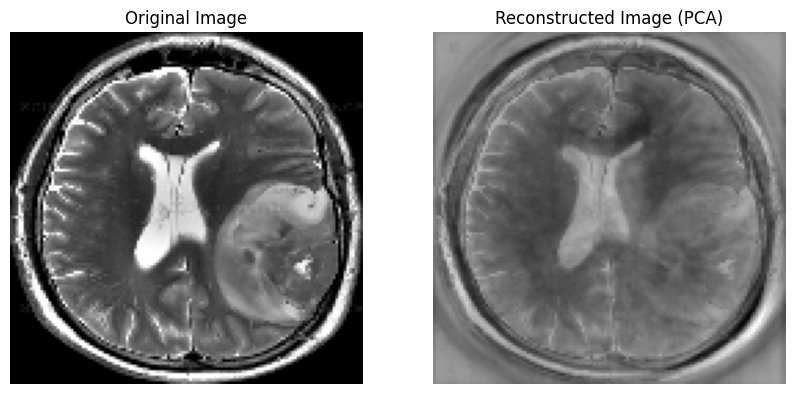

In [21]:
import matplotlib.pyplot as plt

#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Reconstruct One random row of X_train and reshape to (128,128) and plot it
#  Then compare it to the original one
#  It is better to use gray cmap for images
#####################################################################################
rand_idx = np.random.randint(0, X_train.shape[0])
reconstructed_flat = reconstruct_PCA(X_train_red, mean, Vt)
reconstructed_img = reconstructed_flat[rand_idx, :].reshape(IMG_HEIGHT, IMG_WIDTH)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train[rand_idx, :].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title("Reconstructed Image (PCA)")
plt.axis('off')

plt.show()
####################################################################################
#                                   THE END                                        #
####################################################################################


# Classifier

In this section use Support Vector Machine (SVM) for predicting Tumor from features.


Our purpose is comparing accuracy on test data before and after dimensionality reduction. Guess for yourself accuracy before and after PCA.

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model =  SVC(kernel='linear')

## Before dimensionality reduction

In [23]:
before_accuracy = None
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Train model on X_train and report accuracy on X_test
#####################################################################################

model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)
before_accuracy = accuracy_score(y_test, y_pred_before)
print("Accuracy before dimensionality reduction: ", before_accuracy)
####################################################################################
#                                   THE END                                        #
####################################################################################


Accuracy before dimensionality reduction:  0.7450980392156863


## After dimensionality reduction

In [24]:
after_accuracy = None
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Train model on X_train_red and report accuracy on X_test_red
#####################################################################################
model.fit(X_train_red, y_train)
y_pred_after = model.predict(X_test_red)
after_accuracy = accuracy_score(y_test, y_pred_after)
print("Accuracy after PCA:", after_accuracy)
####################################################################################
#                                   THE END                                        #
####################################################################################

Accuracy after PCA: 0.5490196078431373


When you get better accuracy?

 Can you explain why?

 Does unsupervised dimensionality reduction always increase accuracy?


**** your answer****

The model performs better when we use the data without reduction.

When are facing a supervised problem, the PCA might lose some of the important data. This is because the PCA model is not aware of the labels so when choosing high variance features, some features with more importance but lower variance get lost.


<font  size=5>
GOOD LUCK